In [2]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install --upgrade plotly

   ---------------------------------------- 0.0/16.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.3 MB ? eta -:--:--
    --------------------------------------- 0.3/16.3 MB ? eta -:--:--
   - -------------------------------------- 0.5/16.3 MB 1.2 MB/s eta 0:00:14
   -- -------

In [4]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [6]:
import plotly.io as pio
pio.renderers.default = "iframe"

In [8]:
# Create a Ticker Object for Tesla
tesla =  yf.Ticker("TSLA")

In [10]:
#Extract historical data with period set to "max"
tesla_data = tesla.history(period="max")

In [12]:
tesla_data.reset_index(inplace=True)

In [94]:
import requests

response = requests.get("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm")

In [96]:
html_data = response.text

In [24]:
soup = BeautifulSoup(html_data, 'html.parser')

In [30]:
tables = soup.find_all("tbody")
revenue_table = tables[1]  

tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in revenue_table.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()  # <- KEEP formatting
        if revenue:
            new_row = pd.DataFrame({"Date": [date], "Revenue": [revenue]})
            tesla_revenue = pd.concat([tesla_revenue, new_row], ignore_index=True)

print(tesla_revenue.head())


         Date  Revenue
0  2022-09-30  $21,454
1  2022-06-30  $16,934
2  2022-03-31  $18,756
3  2021-12-31  $17,719
4  2021-09-30  $13,757


In [34]:
revenue = cols[1].text.strip().replace("$", "").replace(",", "")

In [36]:
revenue = cols[1].text.strip().replace("$", "").replace(",", "")
print(tesla_revenue.head())

         Date Revenue
0  2022-09-30   21454
1  2022-06-30   16934
2  2022-03-31   18756
3  2021-12-31   17719
4  2021-09-30   13757


In [42]:
print(tesla_revenue.tail()

          Date Revenue
48  2010-09-30      31
49  2010-06-30      28
50  2010-03-31      21
51  2009-09-30      46
52  2009-06-30      27


In [50]:
gme = yf.Ticker("GME")

In [52]:
gme_data = gme.history(period="max")

In [54]:
gme_data.reset_index(inplace=True)

In [58]:
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683251  11021600   
2 2002-02-15 00:00:00-05:00  1.683251  1.687459  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [68]:
import requests

In [70]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

response = requests.get("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html")

html_data_2 = response.text



In [72]:
soup = BeautifulSoup(html_data_2, 'html.parser')

In [76]:
revenue_table = soup.find_all("tbody")[1]

gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Loop through the rows
for row in revenue_table.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        if revenue:  # Skip empty rows
            gme_revenue = pd.concat(
                [gme_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})],
                ignore_index=True
            )

print(gme_revenue.head())

         Date Revenue
0  2020-04-30    1021
1  2020-01-31    2194
2  2019-10-31    1439
3  2019-07-31    1286
4  2019-04-30    1548


In [78]:
print(gme_revenue.tail())

          Date Revenue
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709


In [80]:
def make_graph(stock_data, revenue_data, stock):
    import matplotlib.pyplot as plt

    fig, ax1 = plt.subplots(figsize=(14, 6))

    # Filter data up to June 2021
    stock_data = stock_data[stock_data.Date <= '2021-06-30']
    revenue_data = revenue_data[revenue_data.Date <= '2021-06-30']

    ax1.plot(stock_data.Date, stock_data.Close, color='tab:red')
    ax1.set_ylabel('Stock Price ($)', color='tab:red')
    ax1.tick_params(axis='y', labelcolor='tab:red')
    ax1.set_xlabel('Date')
    ax1.set_title(f"{stock} Stock Price and Revenue")

    ax2 = ax1.twinx()
    ax2.plot(revenue_data.Date, revenue_data.Revenue.astype(float), color='tab:blue')
    ax2.set_ylabel('Revenue ($)', color='tab:blue')
    ax2.tick_params(axis='y', labelcolor='tab:blue')

    plt.show()


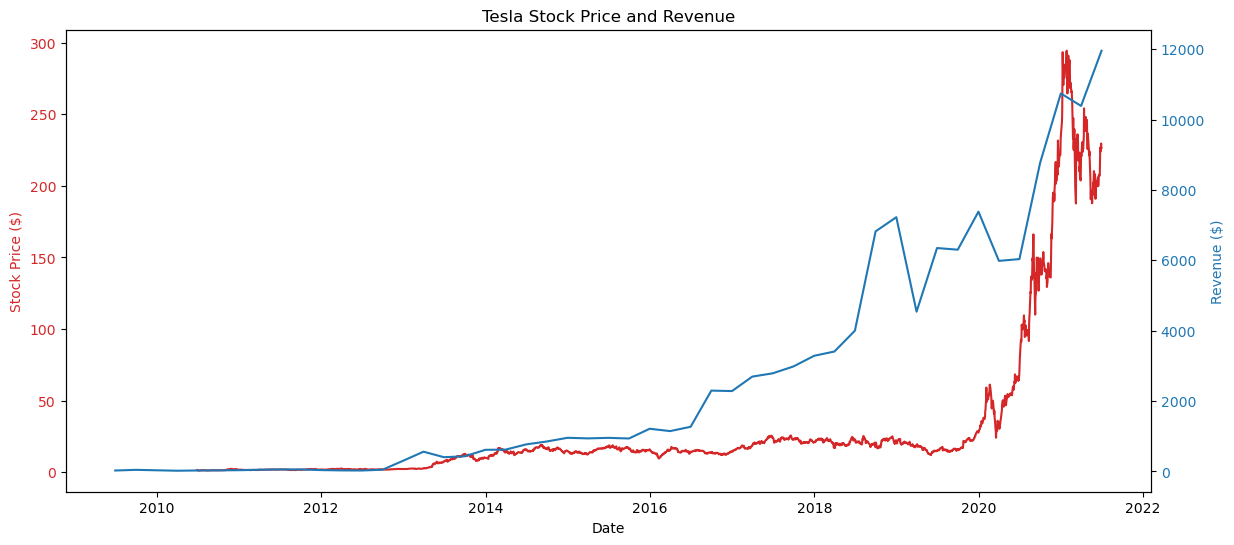

In [84]:
# Step 1: Ensure datetime format
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

# Step 2: Call the graph function
make_graph(tesla_data, tesla_revenue, 'Tesla')

In [86]:
gme_data['Date'] = pd.to_datetime(gme_data['Date'])
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])


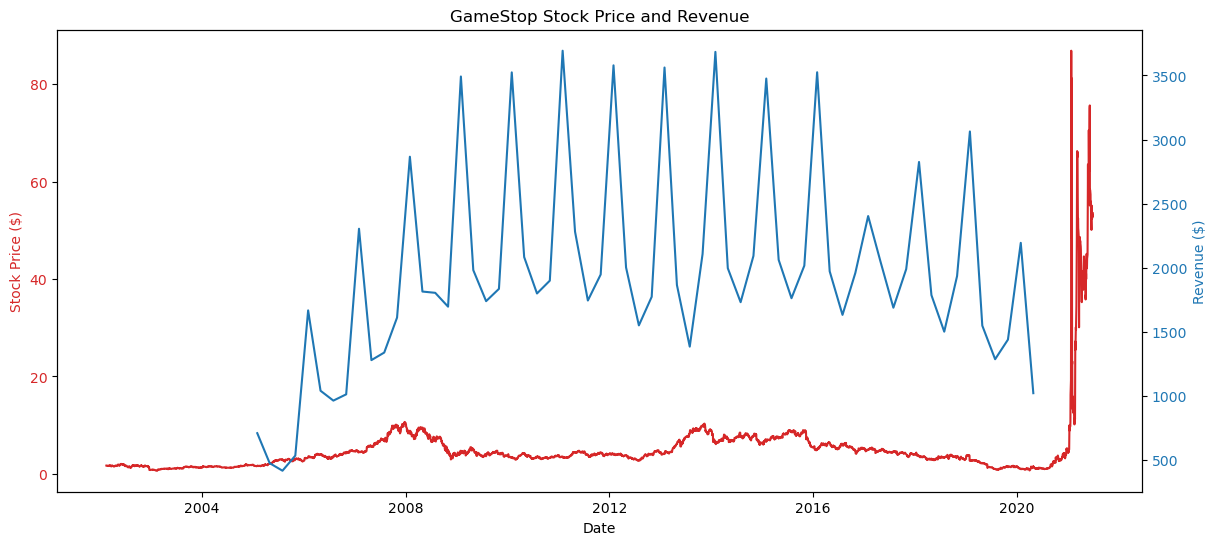

In [88]:
make_graph(gme_data, gme_revenue, 'GameStop')

In [90]:
def make_graph(stock_data, revenue_data, stock):
    import matplotlib.pyplot as plt

    fig, ax1 = plt.subplots(figsize=(14, 6))

    # Filter data up to June 2021
    stock_data = stock_data[stock_data.Date <= '2021-06-30']
    revenue_data = revenue_data[revenue_data.Date <= '2021-06-30']

    ax1.plot(stock_data.Date, stock_data.Close, color='tab:red')
    ax1.set_ylabel('Stock Price ($)', color='tab:red')
    ax1.tick_params(axis='y', labelcolor='tab:red')
    ax1.set_xlabel('Date')
    ax1.set_title(f"{stock} Stock Price and Revenue")

    ax2 = ax1.twinx()
    ax2.plot(revenue_data.Date, revenue_data.Revenue.astype(float), color='tab:blue')
    ax2.set_ylabel('Revenue ($)', color='tab:blue')
    ax2.tick_params(axis='y', labelcolor='tab:blue')

    plt.show()


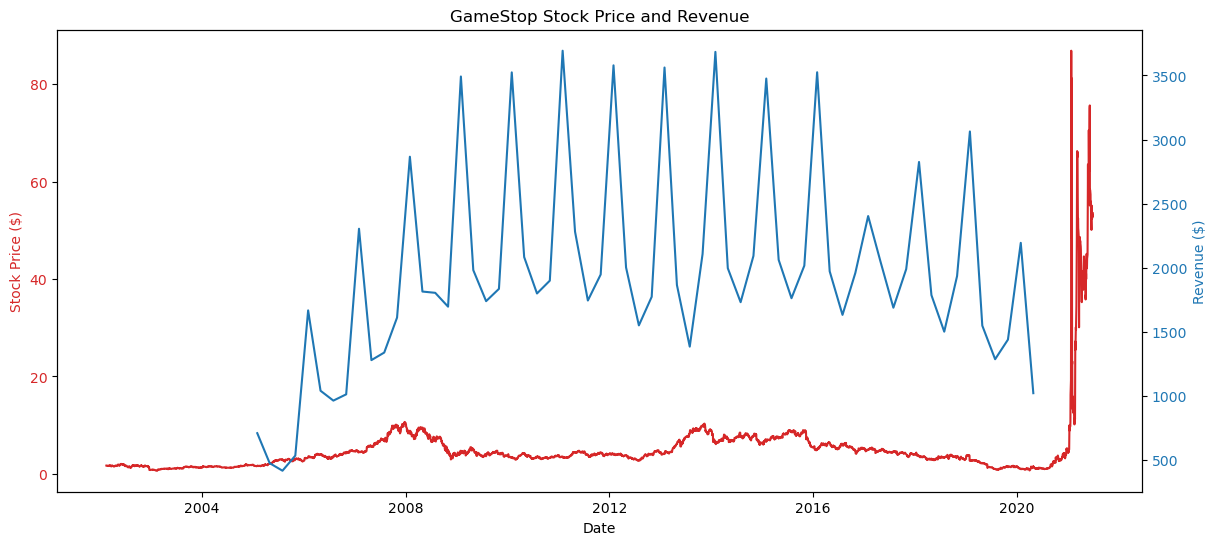

In [92]:
make_graph(gme_data, gme_revenue, 'GameStop')
